In [340]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [341]:
dictionaries = [
            cv2.aruco.DICT_7X7_100, 
            cv2.aruco.DICT_APRILTAG_36h11,
            cv2.aruco.DICT_ARUCO_MIP_36h12,
            ]


# Distance measurement
mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
undist = np.array([0,0,0,0,0])
dist=undist

markerLengthdic = {"13": 0.1, "20":0.1} #marker lenght in meters depending on the type of marker


def detect_and_plot(image, plot = True, dictionaries=dictionaries, points=[]):
    parameters =  cv2.aruco.DetectorParameters()
    info = []
    rejectedCandidates=[]

    for d, dictionar in enumerate(dictionaries):
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorner, markerId, rejectedCandidate = detector.detectMarkers(image)
        markerLength = 0.1 #markerLengthdic[str(dictionar)]
        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist)
        if markerCorner:
            for corner,Id, r in zip(markerCorner, markerId, rejectedCandidate):
                # print(len(info))
                # print(Id)        
                info.append([corner,Id, rvecs, tvecs])

        if rejectedCandidate:
            rejectedCandidates.append(rejectedCandidate)
        
    print("Number of detected markers:", len(info))
    # print("Number of rejected candidates:", len(rejectedCandidates))

    if plot:
        for candidate, Id, _, _ in info:
                candidate = np.array(candidate)[0].reshape((4, 2))  # Get the 4 corner points
                for i in range(4):
                    # Convert to integers
                    pt1 = tuple(map(int, candidate[i]))
                    pt2 = tuple(map(int, candidate[(i + 1) % 4]))
                    cv2.line(image, pt1, pt2, (0,255, 0), 5)
                if Id is not None:
                    # Annotate marker ID near the first corner with highlighted text
                    text = str(Id[0])
                    font = cv2.FONT_HERSHEY_SIMPLEX
                    font_scale = 0.6
                    thickness = 2
                    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
                    text_origin = (pt1[0], pt1[1] - 5)  # Adjust Y to position above the corner

                    # Draw background rectangle
                    cv2.rectangle(image, 
                                (text_origin[0], text_origin[1] - text_size[1] - 5), 
                                (text_origin[0] + text_size[0], text_origin[1] + 20), 
                                (255, 255, 255), 
                                -1)
                    cv2.putText(image, str(Id[0]), pt1, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
                
                if len(points) >0:
                    for p in points:
                        center = tuple(map(int, p))
                        cv2.circle(image, center, 1, (255, 0,0), 10)

                # # Optionally, draw a circle at each corner for visibility
                # for point in candidate:
                #     pt = tuple(map(int, point))
                #     cv2.circle(image, pt, 1, (0, 0, 255), -1)
                
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    return info

(381, 608, 3)


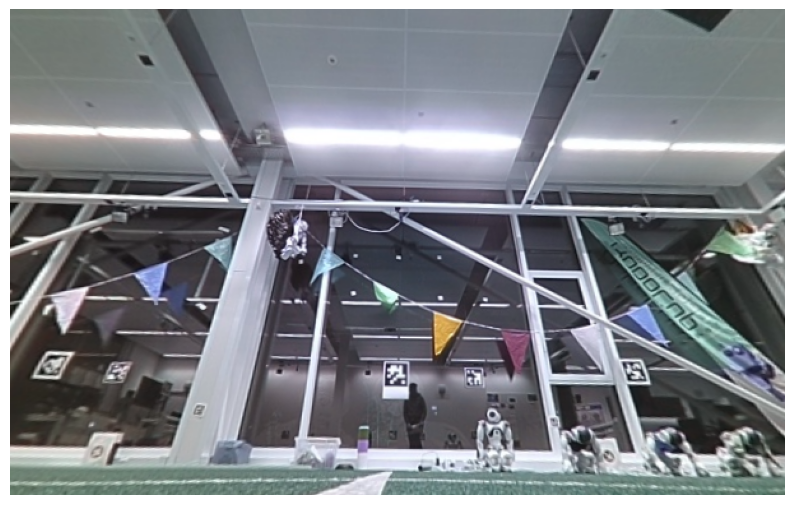

In [342]:

img = "../../images/center_of_pitch.png"
image = cv2.imread(img)
print(image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [343]:
# Variables
dictionaries = [
            cv2.aruco.DICT_7X7_100, #este
            cv2.aruco.DICT_APRILTAG_36h11,#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11),#este
            # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_MIP_36h12),#este
            cv2.aruco.DICT_ARUCO_MIP_36H12 #este
            ]

parameters =  cv2.aruco.DetectorParameters()

mtx = np.array([[2.819553679831719251e+02, 0.000000000000000000e+00, 3.262468506102194397e+02],
                [0.000000000000000000e+00, 2.810872370991155549e+02, 2.079618310698781727e+02],
                [0.000000000000000000e+00, 0.000000000000000000e+00, 1.000000000000000000e+00]])
dist = np.array([-2.907715721478895121e-01, 9.026962260361984236e-02, -1.148611991451896396e-03, 8.210446409115852728e-05, -1.226467727111531236e-02])
dist = np.array([0,0,0,0,0])


# Unique marker keys with (x, x, z (in mm), length_of_square (in m))
markers = {
    # window
    # "36H11_
    "79": (-4500, 1060 + 3000 + 50, 510, 0.08, "window"),
    # "36H11_
    "26": (-4500 + 450, 130 + 1060 + 3000 + 50, 1080, 0.235, "window"),
    # "36H12_
    "67": (-4500 + 450 + 530 + 80, 130 + 1060 + 3000 + 50, 1000, 0.2, "window"),
    # "36H11_
    "69": (-1800, 620 + 3000 + 50, 500, 0.08, "window"),
    # "36H11_
    "18": (0, 130 + 1060 + 3000 + 50, 1050, 0.28, "window"),
    # "36H12_
    "47": (840, 130 + 1060 + 3000 + 50, 1050, 0.2, "window"),
    # "36H11_
    "9": (840 + 850, 1060 + 3000 + 50, 500, 0.08, "window"),
    # "36H11_
    "66": (840 + 850 + 1150, 130 + 1060 + 3000 + 50, 1100, 0.235, "window"),


    # tables
    # "36H11_
    "39": (4500, 1100, 500, 0.08, "tables"),
    # "36H11_
    "46": (4550 + 820, 0, 1680, 0.235, "tables"),  # the one up
    # "36H12_
    "57": (4550 + 820, 0, 1000, 0.2, "tables"),  # the lower one
    # "36H11_
    "49": (4500, -1100, 500, 0.08, "tables"),


    # wall
    # "36H11_
    "16": (2850, -2000 - 3005, 1070, 0.235, "wall"),
    # "36H11_
    "19": (2850 - 1050, -2000 - 3005, 510, 0.08, "wall"),
    # "7x7_
    "37": (2850 - 1050 - 850, -2000 - 3005, 1000, 0.2, "wall"),
    # "36H11_
    "29": (2850 - 1050 - 850 - 1050, -2000 - 3005, 500, 0.08, "wall"),  # one on the bottom
    # "36H11_
    "8": (2850 - 1050 - 850 - 1050, -2000 - 3005, 1060, 0.275, "wall"),  # one on top
    # "36H11_
    "59": (-2800 + 1050, -120 - 3005, 510, 0.08, "wall"),  # column one
    # "7x7_
    "27": (-2800, -2000 - 3005, 1000, 0.2, "wall"),  #
    # "36H11_
    "36": (-2800 - 900, -2000 - 3005, 1080, 0.235, "wall"),


    # ducks
    # "7x7_
    "7": (-4600 - 50 - 930, 0, 1680, 0.2, "ducks"),  # lower one in column
    # "36H11_
    "56": (-4600 - 50 - 930, 0, 1000, 0.235, "ducks"),  # top one in column
    # "36H11_
    "89": (-4500, -1100, 450, 0.08, "ducks"),
    # "36H11_
    "99": (-4500, 1100, 500, 0.08, "ducks"),  # window
}


In [344]:
def triangulate_3d(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B):
    # print(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B)
    A = -2 * (x_A - x_B)
    B = -2 * (y_A - y_B)
    C = d_A**2 - z_A**2 - d_B**2 + z_B**2 - x_A**2 + x_B**2 - y_A**2 + y_B**2

    if B == 0:        
        x1 = C / A
        x2 = C/A

        a = 1
        b = -2 * y_B
        c = (x1**2 - 2*x1 * x_B + x_B**2) + y_B**2 + z_B**2 - d_B**2
        # print("b2-4ac",b**2 - 4*a*c)
        root = b**2 - 4*a*c
        if root >=0:
            y1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
            y2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
        else:
            print("Coudln't find match")
            return None

    else:
        a = 1 + A**2/B**2
        b = -2*(x_A + A*C/B**2 - y_A * A/B)
        c = x_A**2 + z_A**2 -d_A**2 - 2*y_A*C/B + (C/B)**2 + y_A**2

        x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
        x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)

        if d_B**2 - z_B**2 - (x1-x_B)**2 >= 0 and d_B**2 - z_B**2 - (x2-x_B)**2 >0:
            y1 = y_B + np.sqrt(d_B**2 - z_B**2 - (x1-x_B)**2)
            y2 = y_B + np.sqrt(d_B**2 - z_B**2 - (x2-x_B)**2)
        else:
            print("Coudln't find match because they don't intersect")
            return None

    return (x1, y1), (x2, y2)

# Example usage isosceles triangle:
x_A, y_A, z_A, d_A = 0, 0, 0, 8  # Reference point A
x_B, y_B, z_B, d_B = 5, 0, 0, 8  # Reference point B

position1, position2 = triangulate_3d(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B)
print(f"Possible Position 1: {position1}")
print(f"Possible Position 2: {position2}")
print("Should be +-", np.sqrt(8**2-2.5**2))


Possible Position 1: (2.5, np.float64(7.599342076785332))
Possible Position 2: (2.5, np.float64(-7.599342076785332))
Should be +- 7.599342076785332


In [345]:
def get_robot_global_coords(marker_global_coords, rvecs, tvecs):
    # Convert rvecs to rotation matrix
    R, _ = cv2.Rodrigues(rvecs)
    t = tvecs.reshape(3, 1)
    
    # Construct Camera-to-Marker transformation
    cam_to_marker = np.eye(4)
    cam_to_marker[:3, :3] = R
    cam_to_marker[:3, 3] = t.flatten()
    
    # Invert to get Marker-to-Camera transformation
    marker_to_cam = np.eye(4)
    marker_to_cam[:3, :3] = R.T
    marker_to_cam[:3, 3] = -R.T @ t.flatten()
    
    # Construct Marker-to-Global transformation
    marker_to_global = np.eye(4)
    marker_to_global[:3, 3] = marker_global_coords[:3]
    
    # Compute Camera (Robot) global transformation
    cam_to_global = marker_to_global @ marker_to_cam
    
    # Extract robot global coordinates
    robot_global_coords = cam_to_global[:3, 3]
    return robot_global_coords

def twopointstriangulation(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B):
    # print(d_A,d_B)
    return triangulate_3d(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B)

def compute_triangulation(markers_in_img):
    pairs = []
    for i in range(len(markers_in_img)):
        for j in range(i + 1, len(markers_in_img)):
            pairs.append((i, j))

    points = []
    
    for (idx_A, idx_B) in pairs:
        #markers_in_img = [markerCorner, markers[str(markerId[0])], distance, markerID]
        print("Pair",markers_in_img[idx_A][3], markers_in_img[idx_B][3])
        x_A, y_A, z_A = markers_in_img[idx_A][1][:3]
        x_B, y_B, z_B = markers_in_img[idx_B][1][:3]
        d_A = markers_in_img[idx_A][2]
        d_B = markers_in_img[idx_B][2]
        out = twopointstriangulation(x_A, y_A, z_A, d_A, x_B, y_B, z_B, d_B)
        if out != None:
            (x1, y1), (x2, y2) = out
            # print(f"Possible Position 1: {x1,y1}")
            # print(f"Possible Position 2: {x2,y2}")
            # We remove the option that is behind the limits of the field. This iwhy it is useful to have the center in the center of the field
            if abs(y1) > 6000 or abs(x1) > 9000:
                print("Point",markers_in_img[idx_A][3],":", x_A, y_A, z_A, d_A)
                print("Point",markers_in_img[idx_B][3],":", x_B, y_B, z_B, d_B)
                print("Chosen", x2,y2)
                points.append([x2,y2,0])
            elif abs(y2) > 6000 or abs(x2) > 9000:
                print("Point",markers_in_img[idx_A][3],":", x_A, y_A, z_A, d_A)
                print("Point",markers_in_img[idx_B][3],":", x_B, y_B, z_B, d_B)
                print("Chosen", x1,y1)
                points.append([x1,y1,0])
            else:
                print("Discarted pair because out of field")
        print("")
        
    if len(points)!=0:
        return np.array(points).mean(axis=0)
    else:
        return []


def detect_and_locate_old(image):
    markers_in_img = []
    robot_global_coords_markers = []
    triangulation = []
    for dictionar in dictionaries:
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorners_dict, markerIds_dict, _ = detector.detectMarkers(image)
        if markerCorners_dict:
            for markerCorner, markerId in zip(markerCorners_dict, markerIds_dict):
                if any(np.array_equal(markerCorner, mar[0]) for mar in markers_in_img):
                    continue
                else:
                    if str(markerId[0]) in markers.keys():
                        markerLength = markers[str(markerId[0])][3]
                        print("MarkerId:", markerId[0], ", Marker coordinates + length:", markers[str(markerId[0])]) #markerLength)
                        
                        # With estimatePoseSingleMarkers function
                        rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorner, markerLength, mtx, dist) #in meters bc markerLength is in meter
                        distance = np.linalg.norm(tvecs)*1000
                        print("Distance:", distance)
                        # print("Tvecs*1000:",tvecs*1000)
                        marker_global_coordinates = markers[str(markerId[0])][:3]
                        print("Marker global coord:", marker_global_coordinates)
                        robot_global_coord = get_robot_global_coords(marker_global_coordinates, rvecs, tvecs*1000)
                        markers_in_img.append([markerCorner, markers[str(markerId[0])], distance, markerId[0]]) 
                        robot_global_coords_markers.append(robot_global_coord)
                        # print("Robot_global_coord respect to marker:", robot_global_coord)
                        print("")
    if len(markers_in_img)>=2:
        average_x, average_y, average_z = np.array(robot_global_coords_markers).mean(axis=0)
        print("")
        print("--------------")
        print("")
        out = compute_triangulation(markers_in_img)
        print("out:",out)
        if len(out) != 0:
            x, y, z = out
            return (x, y, z)
        else:
            return (None, None, None)
    else:
        return (None, None, None)
    

    
        

In [346]:
def sort_points(points):
    """
    Sorts four points in the order: top-left, top-right, bottom-left, bottom-right.
    
    Parameters:
        points (list or np.ndarray): A list or array of four points, each as [x, y].
    
    Returns:
        list: Sorted points as [top-left, top-right, bottom-left, bottom-right].
    """
    # Convert to numpy array for easy manipulation
    points = np.array(points)
    
    # Sort points by Y-coordinate (ascending)
    sorted_by_y = points[np.argsort(points[:, 1])]
    
    # Top two points (lower y-coordinates)
    top_points = sorted_by_y[:2]
    # Bottom two points (higher y-coordinates)
    bottom_points = sorted_by_y[2:]
    
    # Sort each group by X-coordinate
    top_left, top_right = top_points[np.argsort(top_points[:, 0])]
    bottom_left, bottom_right = bottom_points[np.argsort(bottom_points[:, 0])]
    
    # Return points in the desired order
    return np.array([top_left, top_right, bottom_left, bottom_right])


def detect_and_locate(image):
    markers_in_img = []
    markers_3D_coords = []
    markers_2D_coords = []
    for dictionar in dictionaries:
        dictionary = cv2.aruco.getPredefinedDictionary(dictionar)
        detector = cv2.aruco.ArucoDetector(dictionary, parameters)
        markerCorners_dict, markerIds_dict, _ = detector.detectMarkers(image)
        if markerCorners_dict:
            for markerCorner, markerId in zip(markerCorners_dict, markerIds_dict):                    
                if any(np.array_equal(markerCorner, mar[0]) for mar in markers_in_img):
                    continue
                elif markerId == 27:
                    continue
                else:
                    if str(markerId[0]) in markers.keys():
                        markers_in_img.append(markerCorner) #We add it to the list
                        
                        print("MarkerId:", markerId[0], ", Marker coordinates", markers[str(markerId[0])][:3], "length:", markers[str(markerId[0])][3], "in:",  markers[str(markerId[0])][4])
                        length = int(markers[str(markerId[0])][3]*1000) #mm
                        print(int(length))

                        if markers[str(markerId[0])][4] == "window":
                            # 3D coordinates   Left = Negative X
                            xc_ul, yc_ul, zc_ul = np.array(markers[str(markerId[0])][:3]) + np.array([-1, 0, 1])*length/2 #up left
                            xc_ur, yc_ur, zc_ur = np.array(markers[str(markerId[0])][:3]) + np.array([1, 0, 1])*length/2 #up right
                            xc_dl, yc_dl, zc_dl = np.array(markers[str(markerId[0])][:3]) + np.array([-1, 0, -1])*length/2 #down left
                            xc_dr, yc_dr, zc_dr = np.array(markers[str(markerId[0])][:3]) + np.array([1, 0, -1])*length/2 #down right
                        elif markers[str(markerId[0])][4] == "tables":
                            # 3D coordinates   Left = Positive Y
                            xc_ul, yc_ul, zc_ul = np.array(markers[str(markerId[0])][:3]) + np.array([0, 1,  1])*length/2 #up left
                            xc_ur, yc_ur, zc_ur = np.array(markers[str(markerId[0])][:3]) + np.array([0, -1, 1])*length/2 #up right
                            xc_dl, yc_dl, zc_dl = np.array(markers[str(markerId[0])][:3]) + np.array([0, 1, -1])*length/2 #down left
                            xc_dr, yc_dr, zc_dr = np.array(markers[str(markerId[0])][:3]) + np.array([0, -1, -1])*length/2 #down right
                        elif markers[str(markerId[0])][4] == "wall":
                            # 3D coordinates   Left = Positive X
                            xc_ul, yc_ul, zc_ul = np.array(markers[str(markerId[0])][:3]) + np.array([1, 0, 1])*length/2 #up left
                            xc_ur, yc_ur, zc_ur = np.array(markers[str(markerId[0])][:3]) + np.array([-1, 0, 1])*length/2 #up right
                            xc_dl, yc_dl, zc_dl = np.array(markers[str(markerId[0])][:3]) + np.array([1, 0, -1])*length/2 #down left
                            xc_dr, yc_dr, zc_dr = np.array(markers[str(markerId[0])][:3]) + np.array([-1, 0, -1])*length/2 #down right
                        elif markers[str(markerId[0])][4] == "ducks":
                            # 3D coordinates    Left = Negative Y
                            xc_ul, yc_ul, zc_ul = np.array(markers[str(markerId[0])][:3]) + np.array([0, -1,  1])*length/2 #up left
                            xc_ur, yc_ur, zc_ur = np.array(markers[str(markerId[0])][:3]) + np.array([0, 1, 1])*length/2 #up right
                            xc_dl, yc_dl, zc_dl = np.array(markers[str(markerId[0])][:3]) + np.array([0, -1, -1])*length/2 #down left
                            xc_dr, yc_dr, zc_dr = np.array(markers[str(markerId[0])][:3]) + np.array([0, 1, -1])*length/2 #down right
                        print("Real words coordinates for corners")
                        print(xc_ul, yc_ul, zc_ul)
                        print(xc_ur, yc_ur, zc_ur)
                        print(xc_dl, yc_dl, zc_dl)
                        print(xc_dr, yc_dr, zc_dr)
                        # coords3D = [[xc_ul, yc_ul, zc_ul],[xc_ur, yc_ur, zc_ur],[xc_dl, yc_dl, zc_dl],[xc_dr, yc_dr, zc_dr]]
                        markers_3D_coords.append([xc_ul, yc_ul, zc_ul])
                        markers_3D_coords.append([xc_ur, yc_ur, zc_ur])
                        markers_3D_coords.append([xc_dl, yc_dl, zc_dl])
                        markers_3D_coords.append([xc_dr, yc_dr, zc_dr])


                        # 2D coordinates
                        coords = sort_points(markerCorner[0])
                        for coord in coords:
                            markers_2D_coords.append(coord)
    print("Number of corners used for PnP:",len(markers_2D_coords), len(markers_3D_coords))
    success, _, tvecs = cv2.solvePnP(np.array(markers_3D_coords), np.array(markers_2D_coords), mtx, (0,0,0,0,0), flags=cv2.SOLVEPNP_IPPE)
    
    # print("Tvecs:",tvecs)
    # marker_global_coordinates = markers[str(markerId[0])][:3]
    # robot_global_coord = get_robot_global_coords(marker_global_coordinates, rvecs, tvecs)
    if not success:
        tvecs = [None, None, None]
    # print("Robot coordinates:", robot_global_coord)
    else:
        print("vector:", np.array(tvecs)-markers_3D_coords[0][0])
        distance = np.linalg.norm(np.array(tvecs)-markers_3D_coords[0][0])
        print("Distance:", distance)
    return tvecs, markers_2D_coords


In [347]:
# Localization
img = "marker_imgs/image_4.png"
image = cv2.imread(img)
blurred = cv2.GaussianBlur(image, (3, 3), 5)
image = cv2.addWeighted(image, 3, blurred, -2, 0)

# Sharpness filter 4x4
sharpen_filter = np.array(
    [[-1, -1, -1, -1], [-1, 9, 9, -1], [-1, 9, 9, -1], [-1, -1, -1, -1]]
)
sharpened = cv2.filter2D(image, cv2.CV_8U, sharpen_filter)
image = cv2.addWeighted(image, 1.5, sharpened, -0.25, 0)
(average_x, average_y, average_z), markers_2D_coords = detect_and_locate(image)
print("Results:", average_x, average_y, average_z)

MarkerId: 56 , Marker coordinates (-5580, 0, 1000) length: 0.235 in: ducks
235
Real words coordinates for corners
-5580.0 -117.5 1117.5
-5580.0 117.5 1117.5
-5580.0 -117.5 882.5
-5580.0 117.5 882.5
MarkerId: 26 , Marker coordinates (-4050, 4240, 1080) length: 0.235 in: window
235
Real words coordinates for corners
-4167.5 4240.0 1197.5
-3932.5 4240.0 1197.5
-4167.5 4240.0 962.5
-3932.5 4240.0 962.5
Number of corners used for PnP: 8 8
Results: None None None


In [348]:
# %reload_ext autoreload
# %autoreload 2
from astar import PathFinder

import matplotlib.pyplot as plt
from matplotlib import patches

# Dimensions in mm
A = 9000  # Field length
B = 6000  # Field width
C = 50  # Line width
D = 100  # Penalty mark size
E = 600  # Goal area length
F = 2200  # Goal area width
G = 1650  # Penalty area length
H = 4000  # Penalty area width
I = 1300  # Penalty mark distance
J = 1500  # Center circle diameter
K = 2700  # Border strip width

duck_locations = (
    (G, (B + H) / 2),
    (G, (B - H) / 2),
    (E, (B + F) / 2),
    (E, (B - F) / 2),
    (I, B / 2),
)


def visualize_field(xrobot, yrobot):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor("green")  # Set the background color to green

    # Draw the outer field
    outer_field = patches.Rectangle(
        (0, 0), A, B, linewidth=C / 10, edgecolor="white", facecolor="none"
    )
    ax.add_patch(outer_field)

    # Goal areas
    goal_area_left = patches.Rectangle(
        (0, (B - F) / 2), E, F, linewidth=C / 10, edgecolor="white", facecolor="none"
    )
    goal_area_right = patches.Rectangle(
        (A - E, (B - F) / 2),
        E,
        F,
        linewidth=C / 10,
        edgecolor="white",
        facecolor="none",
    )
    ax.add_patch(goal_area_left)
    ax.add_patch(goal_area_right)

    # Penalty areas
    penalty_area_left = patches.Rectangle(
        (0, (B - H) / 2), G, H, linewidth=C / 10, edgecolor="white", facecolor="none"
    )
    penalty_area_right = patches.Rectangle(
        (A - G, (B - H) / 2),
        G,
        H,
        linewidth=C / 10,
        edgecolor="white",
        facecolor="none",
    )
    ax.add_patch(penalty_area_left)
    ax.add_patch(penalty_area_right)

    # Penalty marks
    ax.plot(I, B / 2, "wo", markersize=D / 10)  # Left penalty mark
    ax.plot(A - I, B / 2, "wo", markersize=D / 10)  # Right penalty mark

    # Center circle
    center_circle = patches.Circle(
        (A / 2, B / 2), J / 2, linewidth=C / 10, edgecolor="white", facecolor="none"
    )
    ax.add_patch(center_circle)
    ax.plot(A / 2, B / 2, "wo", markersize=D / 10)  # Center mark

    # Halfway line
    ax.plot([A / 2, A / 2], [0, B], "white", linewidth=C / 10)

    # Plot the ducks
    # For some reason hides the center point
    ax.scatter(*list(zip(*duck_locations)), D, "yellow", zorder=2.5)

    # Robot position
    if xrobot != None:
        ax.plot(int(xrobot) +A/2,int(yrobot) +B/2, "ro", zorder=5)
    else:
        print("Robot coudln't be located")

    # Plot the markers on the field
    for marker, (x, y, z, _, _) in markers.items():
        # Convert (x, y) to pixel coordinates
        x  # *= 1000
        y  # *=1000
        x_img = int((x + A / 2))
        y_img = int((y + B / 2))

        # Draw a blue circle for each marker
        ax.plot(x_img, y_img, "bo", markersize=5)
        ax.text(x_img, y_img-400, marker)

    # Set the limits and aspecs
    ax.set_xlim(-K, A + K)
    ax.set_ylim(-K, B + K)
    ax.set_aspect("equal", adjustable="box")
    ax.axis("off")  # Turn off axe
    return fig, ax

In [349]:
print(average_x,average_y)

None None


Number of detected markers: 8


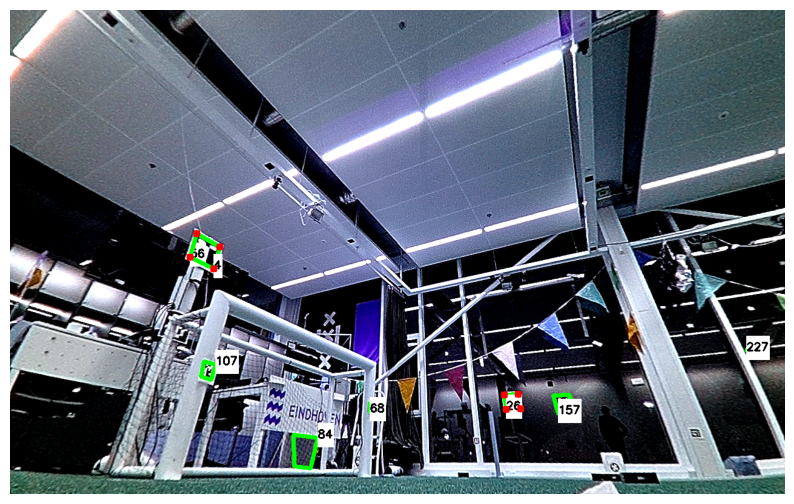

Robot coudln't be located


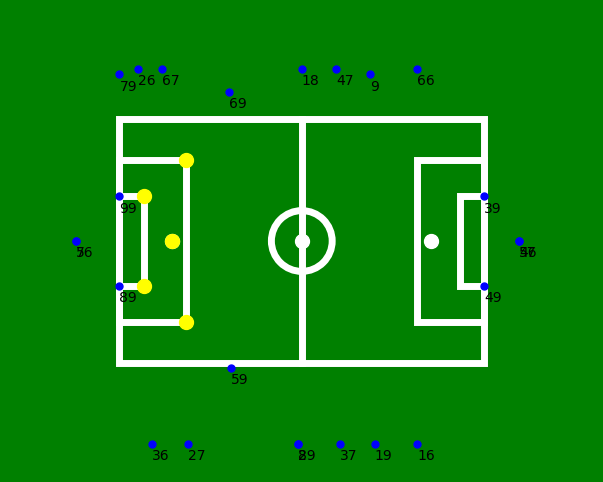

In [350]:
# Later when we use this function to animate the robot, we can use blitting to speed up the animation
# https://matplotlib.org/stable/users/explain/animations/blitting.html
# print(markers)
_ = detect_and_plot(image, points = markers_2D_coords)
fig, ax = visualize_field(average_x, average_y)

# Show position
# ax.plot(average_x, average_y, 'ro', markersize=10)


def select_duck(duck_locations, idx):
    return duck_locations[idx], duck_locations[:idx] + duck_locations[idx + 1 :]

if average_x != None:
    start = (average_x + A/2,average_y + B/2)
    # Select the first duck
    goal, obstacles = select_duck(duck_locations, 0)

    pathfinder = PathFinder(40, 20, A, B)
    path_coordinates, debug = pathfinder.find_path(start, goal, obstacles, distance_metric="euclidian", debug=True)
    # print(path_coordinates)
    # print(debug)

    ax.scatter(*list(zip(*path_coordinates)), C / 2, "k", zorder=3)
